In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/home/amal/Drive A/ds/project_notebook/MotoGP/which-nation-excels-in-the-MotoGP/Dataset/constructure-world-championship.csv')

In [3]:
data.head(5)

,Season,Constructor,Class
0,2021,Yamaha,MotoGP™
1,2021,Kalex,Moto2™
2,2021,KTM,Moto3™
3,2021,Energica,MotoE™
4,2020,Suzuki,MotoGP™


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       284 non-null    int64 
 1   Constructor  284 non-null    object
 2   Class        284 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.8+ KB


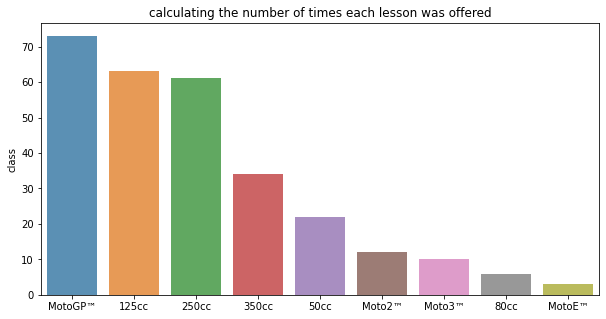

In [5]:
class_count=data['Class'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=class_count.index,y=class_count.values[:20],alpha=0.8)
plt.title('calculating the number of times each lesson was offered')
plt.ylabel("class")
plt.show()

# total constructors

In [6]:
# total constructors
constructors=data['Constructor'].value_counts()
print(constructors,"\nTotal is",len(constructors))

Honda                65
Yamaha               38
MV Agusta            35
Aprilia              18
Suzuki               16
Derbi                11
Kalex                10
Kawasaki              9
Moto Guzzi            8
Gilera                8
Garelli               6
Kreidler              6
NSU                   5
KTM                   5
Mondial               5
Harley Davidson       4
Morbidelli            4
Bultaco               3
Norton                3
Benelli               3
Energica              3
Krauser               2
Velocette             2
Minarelli             2
MBA                   2
Van Veen-Kreidler     1
JJ Cobas              1
Ducati                1
Kreidler Van Veen     1
Bimota-Yamaha         1
Motul Bultaco         1
Suter                 1
Moriwaki              1
Zundapp               1
Chevallier            1
AJS                   1
Name: Constructor, dtype: int64 
Total is 36


# Japan's Honda and Yamaha are the top two manufacturers, and Italy's MV Augusta is third.

### The amount of constructor championships each nation has won will now be determined.

In [7]:
italian = ['Energica', 'Aprilia', 'Derbi', 'Gilera', 'Ducati', 
           'Garelli', 'Minarelli', 'MBA', 'Bimota-Yamaha', 'Morbidelli', 
           'MV Agusta', 'Benelli', 'Mondial', 'Moto Guzzi']

japanese = ['Yamaha', 'Suzuki', 'Honda', 'Moriwaki', 'Kawasaki']

german = ['Kalex', 'Krauser', 'Zundapp', 'Kreidler']

In [8]:
nation = []
for i, row in data.iterrows():
    if row["Constructor"] in italian:
        nation.append("Italian")
    elif row["Constructor"] in japanese:
        nation.append("Japanese")
    elif row["Constructor"] in german:
        nation.append("German")
    else:
        nation.append("Other")

data["Nation"] = nation

<AxesSubplot:title={'center':'Number of championship wins by country'}, xlabel='Country', ylabel='Number of wins'>

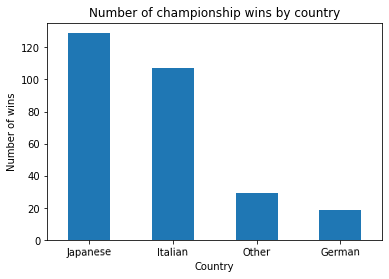

In [9]:
nation_wins = data["Nation"].value_counts()

nation_wins.plot(kind='bar', rot = 1,
                xlabel = "Country", ylabel = "Number of wins",
                title = "Number of championship wins by country")

In [10]:
print(nation_wins)

Japanese    129
Italian     107
Other        29
German       19
Name: Nation, dtype: int64


# In the constructor championships, the Japanese came out on top, followed by the Italians and the Germans.

# See how many wins each nation has received in various categories.

In [11]:
df_by_class=data.groupby(by=['Class','Nation'])['Season'].count()


In [12]:
n_editon=df_by_class.unstack().sum(axis=1)

In [13]:
df_by_class_pct=df_by_class/n_editon
df_by_class_pct

Class    Nation  
125cc    Italian     0.603175
         Japanese    0.349206
         Other       0.047619
250cc    Italian     0.344262
         Japanese    0.540984
         Other       0.114754
350cc    Italian     0.470588
         Japanese    0.382353
         Other       0.147059
50cc     German      0.318182
         Italian     0.090909
         Japanese    0.318182
         Other       0.272727
80cc     German      0.333333
         Italian     0.666667
Moto2™   German      0.833333
         Japanese    0.083333
         Other       0.083333
Moto3™   Japanese    0.500000
         Other       0.500000
MotoE™   Italian     1.000000
MotoGP™  Italian     0.315068
         Japanese    0.657534
         Other       0.027397
dtype: float64

# Let's now plot the number of championships each country won in each category.

<AxesSubplot:title={'center':'Number of wins in each category by each nations'}, xlabel='Class', ylabel='Number  of Championships'>

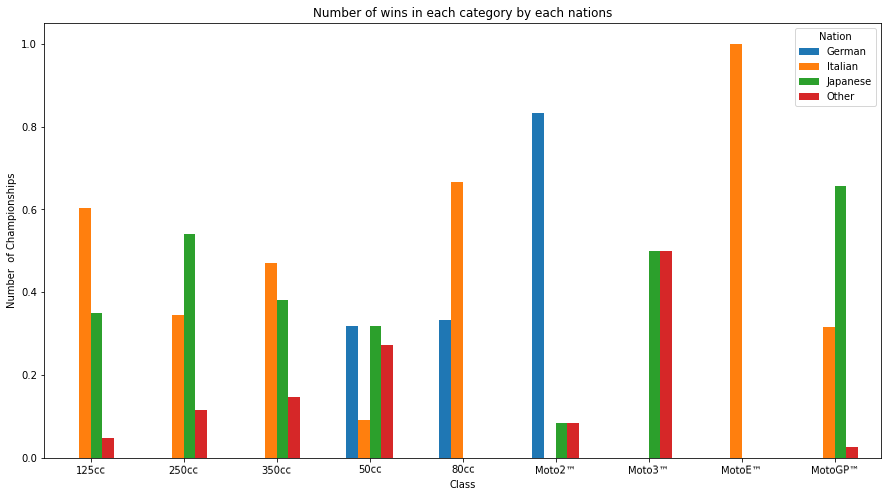

In [14]:

df_by_class_pct.unstack().plot(kind="bar",legend=True,figsize=(15,8),
                              rot=1,ylabel="Number  of Championships",
                              title="Number of wins in each category by each nations")

# The most prosperous manufacturers in the 250cc and MotoGP categories are Japanese ones. Japanese manufacturers appear to be particularly dominating in the MotoGP class in particular (having won just over 65% of all championships).

# German manufacturers are exceptionally successful in the Moto2 division (83% of all editions were won by them), but are not really significant in other classes, which is another intriguing fact.

# Counting the number of titles each country has claimed in the various divisions

In [15]:
df_by_nations=data.groupby(['Nation','Class'])['Season'].count()
df_by_nations

Nation    Class  
German    50cc        7
          80cc        2
          Moto2™     10
Italian   125cc      38
          250cc      21
          350cc      16
          50cc        2
          80cc        4
          MotoE™      3
          MotoGP™    23
Japanese  125cc      22
          250cc      33
          350cc      13
          50cc        7
          Moto2™      1
          Moto3™      5
          MotoGP™    48
Other     125cc       3
          250cc       7
          350cc       5
          50cc        6
          Moto2™      1
          Moto3™      5
          MotoGP™     2
Name: Season, dtype: int64

# converting dataframe to percentage

In [16]:
n_wins_by_nation=df_by_nations.unstack().sum(axis=1)
n_wins_by_nation

Nation
German       19.0
Italian     107.0
Japanese    129.0
Other        29.0
dtype: float64

In [17]:
df_by_nation_pct=df_by_nations/n_wins_by_nation
df_by_nation_pct

Nation    Class  
German    50cc       0.368421
          80cc       0.105263
          Moto2™     0.526316
Italian   125cc      0.355140
          250cc      0.196262
          350cc      0.149533
          50cc       0.018692
          80cc       0.037383
          MotoE™     0.028037
          MotoGP™    0.214953
Japanese  125cc      0.170543
          250cc      0.255814
          350cc      0.100775
          50cc       0.054264
          Moto2™     0.007752
          Moto3™     0.038760
          MotoGP™    0.372093
Other     125cc      0.103448
          250cc      0.241379
          350cc      0.172414
          50cc       0.206897
          Moto2™     0.034483
          Moto3™     0.172414
          MotoGP™    0.068966
dtype: float64

<AxesSubplot:title={'center':'Distribution of Championships for each nation'}, xlabel='Nation', ylabel='Number of Championship won'>

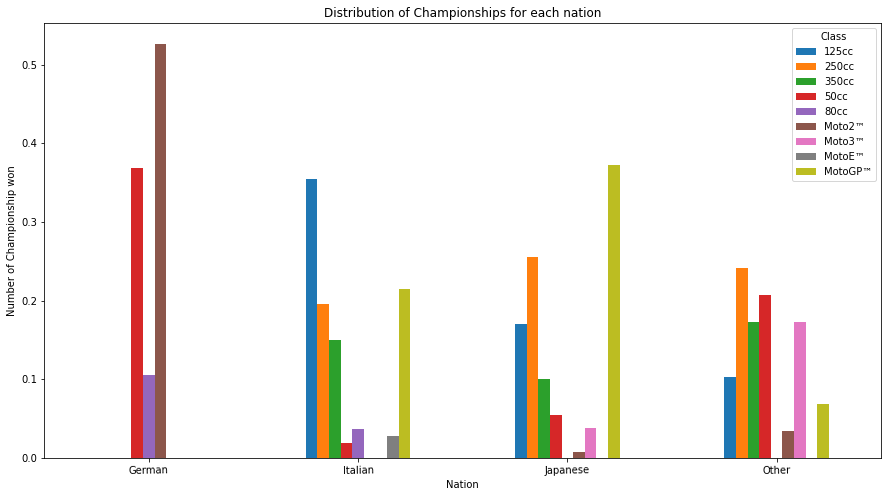

In [18]:
df_by_nation_pct.unstack().plot(kind="bar",figsize=(15,8),
                                xlabel="Nation",ylabel="Number of Championship won",
                                title="Distribution of Championships for each nation",
                                rot=1)

In [19]:
italian_wins=df_by_nations[3:10]
totalWins=sum(italian_wins)

print("Category","% of total wins")
for key ,val in italian_wins.iteritems():
    print(key[1],round(val/totalWins,2)*100)

Category % of total wins
125cc 36.0
250cc 20.0
350cc 15.0
50cc 2.0
80cc 4.0
MotoE™ 3.0
MotoGP™ 21.0


<AxesSubplot:title={'center':'Distribution of wins of italian manufacturers'}, ylabel=' '>

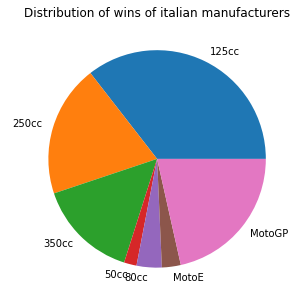

In [20]:
labels = ["125cc", "250cc", "350cc", "50cc", "80cc", "MotoE", "MotoGP"]
italian_wins.plot(kind="pie",figsize=(10,5),ylabel=" ",labels=labels, title="Distribution of wins of italian manufacturers")

# How has the performance of the nation changed throughout the years? Has it been impacted by the switch from 2-stroke to 4-stroke engines?

In [21]:
decades = ["1949-1959", "1960-1969", "1970-1979", "1980-1989", "1990-1999", "2000-2009", "2010-2019", "2020-Present"]
nations_of_interest = ["Italian", "Japanese", "German", "Other"]

wins_by_decade_df = pd.DataFrame(columns = ["Italian", "Japanese", "German", "Other"], index=decades)

for nation in nations_of_interest:
    subdf = data[data["Nation"] == nation]
    decade_wins = {"1949-1959":0, "1960-1969":0, "1970-1979":0, "1980-1989":0, "1990-1999":0, 
                   "2000-2009":0, "2010-2019":0, "2020-Present":0}
    
    for i, row in subdf.iterrows():     
        season = row["Season"]
        if season >= 2020:
            decade_wins["2020-Present"] += 1
        elif 2010 <= season <= 2019:
            decade_wins["2010-2019"] += 1
        elif 2000 <= season <= 2009:
            decade_wins["2000-2009"] += 1
        elif 1990 <= season <= 1999:
            decade_wins["1990-1999"] += 1
        elif 1980 <= season <= 1989:
            decade_wins["1980-1989"] += 1
        elif 1970 <= season <= 1979:
            decade_wins["1970-1979"] += 1
        elif 1960 <= season <= 1969:
            decade_wins["1960-1969"] += 1
        elif 1949 <= season <= 1959:
            decade_wins["1949-1959"] += 1
    
    for i, row in wins_by_decade_df.iterrows():
        wins_by_decade_df.loc[i, nation] = decade_wins[i]

        
wins_by_decade_pct_df = wins_by_decade_df.loc[:, :].div(wins_by_decade_df.sum(axis=1), axis=0)
wins_by_decade_pct_df

,Italian,Japanese,German,Other
1949-1959,0.75,0.0,0.0,0.25
1960-1969,0.354167,0.645833,0.0,0.0
1970-1979,0.34,0.4,0.1,0.16
1980-1989,0.325581,0.488372,0.093023,0.093023
1990-1999,0.266667,0.733333,0.0,0.0
2000-2009,0.433333,0.566667,0.0,0.0
2010-2019,0.096774,0.516129,0.258065,0.129032
2020-Present,0.25,0.25,0.25,0.25


<AxesSubplot:title={'center':'% of all championships won by nation by decade'}, xlabel='Decades', ylabel='% of championships won'>

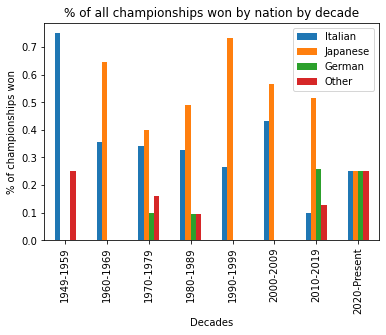

In [22]:
wins_by_decade_pct_df.plot(kind="bar",
                          xlabel = "Decades", ylabel = "% of championships won",
                          title = "% of all championships won by nation by decade")

# Italy led the industry in the 1950s, but starting in the 1960s, Japan became the most successful builder. This decade-by-decade breakdown does not imply that the winning dynamics were impacted by the change in engine type.

In [23]:
pilot_positions=pd.read_csv('/home/amal/Downloads/Dataset/riders-finishing-positions.csv')
pilot_info=pd.read_csv('/home/amal/Downloads/Dataset/riders-info.csv')

In [24]:
pilot_info = pilot_info.rename(columns={'Riders All Time in All Classes': 'Riders'})
pilot_info = pilot_info.fillna(0) # handling missing values
pilot_info.head()

,Riders,Victories,2nd places,3rd places,Pole positions from '74 to 2022,Race fastest lap to 2022,World Championships
0,AGOSTINI Giacomo,122,35.0,2.0,9.0,117.0,15.0
1,ROSSI Valentino,115,67.0,53.0,65.0,96.0,9.0
2,NIETO Angel,90,35.0,14.0,34.0,81.0,13.0
3,MARQUEZ Marc,85,36.0,17.0,90.0,75.0,8.0
4,HAILWOOD Mike,76,25.0,11.0,0.0,79.0,9.0


In [25]:
pilot_nationalities = {}

for i, row in pilot_positions.iterrows():
    if row["Country"] not in pilot_nationalities.keys():
        pilot_nationalities[row["Country"]] = [row["Rider"]]
    else:
        pilot_nationalities[row["Country"]].append(row["Rider"])

In [26]:
pilot_nationalities

{'IT': ['Giacomo Agostini',
  'Valentino Rossi',
  'Max Biaggi',
  'Carlo Ubbiali',
  'Luca Cadalora',
  'Loris Capirossi',
  'Pierpaolo Bianchi',
  'Eugenio Lazzarini',
  'Andrea Dovizioso',
  'Walter Villa',
  'Marco Melandri',
  'Fausto Gresini',
  'Tarquinio Provini',
  'Francesco Bagnaia',
  'Marco Simoncelli',
  'Andrea Iannone',
  'Romano Fenati',
  'Mattia Pasini',
  'Franco Morbidelli',
  'Ezio Gianola',
  'Roberto Locatelli',
  'Enea Bastianini',
  'Loris Reggiani',
  'Paolo Pileri',
  'Enrico Lorenzetti',
  'Franco Uncini',
  'Dennis Foggia',
  'Lucio Cecchinello',
  'Marco Lucchinelli',
  'Marco Bezzecchi',
  'Renzo Pasolini',
  'Libero Liberati',
  'Luca Marini',
  'Doriano Romboni',
  'Umberto Masetti',
  'Simone Corsi',
  'Lorenzo Dalla Porta',
  'Pierfrancesco Chili',
  'Lorenzo Baldassarri',
  'Dario Ambrosini',
  'Matteo Ferrari',
  'Stefano Perugini',
  'Nello Pagani',
  'Nello Pagani',
  'Gilberto Parlotti',
  'Tony Arbolino',
  'Niccolò Antonelli',
  'Bruno Ruffo',

In [27]:
def get_nation_from_pilot(pilot, nation_dict):
    for nation, names in nation_dict.items():
        if pilot in names:
            return nation

In [28]:
nation_list = []
rows_to_remove = []

for i, row in pilot_info.iterrows():
    nameList = row["Riders"].title().split(' ')
    newName = ' '.join(nameList[::-1])
    if newName in set(pilot_positions["Rider"]):
        nation = get_nation_from_pilot(newName, pilot_nationalities)
        nation_list.append(nation)
    else:
        print(f"{newName} not in pilot_positions")
        rows_to_remove.append(i)

pilot_info = pilot_info.drop(pilot_info.index[rows_to_remove])
pilot_info["Country"] = nation_list

Jan Vries De not in pilot_positions
Henk Kessel Van not in pilot_positions
Francois Jean Baldé not in pilot_positions
Lorenzo Porta Dalla not in pilot_positions
Randy Puniet De not in pilot_positions
Mike Meglio Di not in pilot_positions
Alex Angelis De not in pilot_positions
Didier Radigues De not in pilot_positions
Celestino Vietti not in pilot_positions
Fabio Giannantonio Di not in pilot_positions
Philippe Jean Ruggia not in pilot_positions
Idham Khairul Pawi not in pilot_positions
Louis Jean Tournadre not in pilot_positions
Marcellino Lucchi not in pilot_positions
Claude Jean Selini not in pilot_positions
Boet Dulmen Van not in pilot_positions
Luigi Pier Conforti not in pilot_positions
Giuseppe Colnago not in pilot_positions
Cees Dongen Van not in pilot_positions
Adu Celso-Santos not in pilot_positions
Joe Roberts not in pilot_positions
Can Öncü not in pilot_positions


In [29]:
pilot_info.head()

,Riders,Victories,2nd places,3rd places,Pole positions from '74 to 2022,Race fastest lap to 2022,World Championships,Country
0,AGOSTINI Giacomo,122,35.0,2.0,9.0,117.0,15.0,IT
1,ROSSI Valentino,115,67.0,53.0,65.0,96.0,9.0,IT
2,NIETO Angel,90,35.0,14.0,34.0,81.0,13.0,ES
3,MARQUEZ Marc,85,36.0,17.0,90.0,75.0,8.0,ES
4,HAILWOOD Mike,76,25.0,11.0,0.0,79.0,9.0,GB


In [30]:
# obtaining all pilots and nationalities that correspond to the nationality
pilot_nationalites={}
for i,row in pilot_positions.iterrows():
    if row['Country'] not in pilot_nationalites.keys():
        pilot_nationalites[row['Country']]=[row['Rider']]
    else:
        pilot_nationalites[row["Country"]].append(['Rider'])

In [31]:
def get_antion_from_pilot(pilot,nation_dict):
    for nation ,names in nation_dict.items():
        if pilot in names:
            return nation

In [32]:
nation_list = []
rows_to_remove = []

for i, row in pilot_info.iterrows():
    nameList = row["Riders"].title().split(' ')
    newName = ' '.join(nameList[::-1])
    if newName in set(pilot_positions["Rider"]):
        nation = get_nation_from_pilot(newName, pilot_nationalities)
        nation_list.append(nation)
    else:
        print(f"{newName} not in pilot_positions")
        rows_to_remove.append(i)

pilot_info = pilot_info.drop(pilot_info.index[rows_to_remove])
pilot_info["Country"] = nation_list

In [33]:
pilot_info.head()

,Riders,Victories,2nd places,3rd places,Pole positions from '74 to 2022,Race fastest lap to 2022,World Championships,Country
0,AGOSTINI Giacomo,122,35.0,2.0,9.0,117.0,15.0,IT
1,ROSSI Valentino,115,67.0,53.0,65.0,96.0,9.0,IT
2,NIETO Angel,90,35.0,14.0,34.0,81.0,13.0,ES
3,MARQUEZ Marc,85,36.0,17.0,90.0,75.0,8.0,ES
4,HAILWOOD Mike,76,25.0,11.0,0.0,79.0,9.0,GB


In [34]:
n_pilots_per_nation=pilot_info.groupby("Country")["Riders"].count()

<AxesSubplot:title={'center':'Number of pilots per country'}, xlabel='Country', ylabel='Number of pilots'>

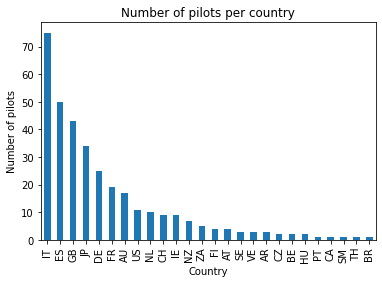

In [35]:
n_pilots_per_nation = n_pilots_per_nation.sort_values(ascending=False)
# plotting
n_pilots_per_nation.plot(kind="bar",
                        xlabel = "Country", ylabel = "Number of pilots",
                        title = "Number of pilots per country")


In [36]:
type(n_pilots_per_nation)

pandas.core.series.Series

How each country's pilots are displaced by the championship

/tmp/ipykernel_27981/2039957805.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([""])
/tmp/ipykernel_27981/2039957805.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([""])
/tmp/ipykernel_27981/2039957805.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels([""])


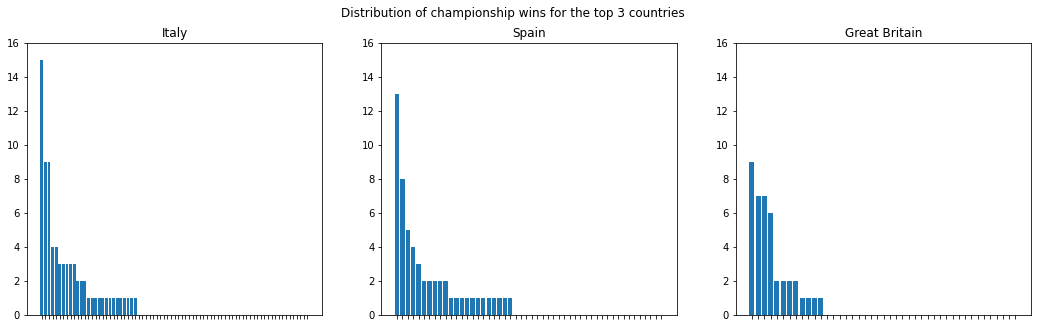

In [37]:
italians = pilot_info[pilot_info["Country"] == "IT"].sort_values(by="World Championships", ascending=False)
spanish = pilot_info[pilot_info["Country"] == "ES"].sort_values(by="World Championships", ascending=False)
british = pilot_info[pilot_info["Country"] == "GB"].sort_values(by="World Championships", ascending=False)


fig, ax = plt.subplots(1, 3, figsize = (18, 5))
fig.suptitle("Distribution of championship wins for the top 3 countries")

ax[0].bar(italians["Riders"], italians["World Championships"])
ax[0].set_title("Italy")
ax[0].set_ylim(bottom = 0, top = 16)
ax[0].set_xticklabels([""])

ax[1].bar(spanish["Riders"], spanish["World Championships"])
ax[1].set_title("Spain")
ax[1].set_ylim(bottom = 0, top = 16)
ax[1].set_xticklabels([""])

ax[2].bar(british["Riders"], british["World Championships"])
ax[2].set_title("Great Britain")
ax[2].set_ylim(bottom = 0, top = 16)
ax[2].set_xticklabels([""])

plt.show()


We can see that even national championships follow a power law. This indicates that a small number of riders account for the majority of championship victories. This implies that a select group of cyclists have won the majority of championships to a greater extent.

# % of pilots that have won championships for the best nations

In [38]:
new_df = pd.DataFrame(columns=["IT", "ES", "GB"], index=["0", "1-5", "6-10", "10+"])

In [39]:
def populate_new_df(pilot_df, new_df):
    nations_of_interest = ["IT", "ES", "GB"]
    
    for nation in nations_of_interest:
        subdf = italians = pilot_info[pilot_info["Country"] == nation]
        
        champ_buckets = {
            "10+": 0,
            "6-10": 0,
            "1-5": 0,
            "0" : 0
        }

        for i, row in subdf.iterrows():
            n = row["World Championships"]
            if n > 10:
                champ_buckets["10+"] += 1
            elif 6 <= n <= 10:
                champ_buckets["6-10"] += 1
            elif 1 <= n <= 5:
                champ_buckets["1-5"] += 1
            elif n == 0.0:
                champ_buckets["0"] += 1

        for i, row in new_df.iterrows():
            row[nation] = champ_buckets[i]

In [40]:
populate_new_df(pilot_info, new_df)
new_df

,IT,ES,GB
0,48,28,31
1-5,24,20,8
6-10,2,1,4
10+,1,1,0


<AxesSubplot:title={'center':'% of pilots who have won championships'}, xlabel='Number of championships', ylabel='% of pilots'>

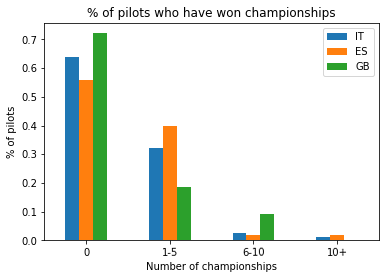

In [41]:
pct_df = new_df.loc[:, :].div(new_df.sum(axis=0), axis=1) # transforming to percentages
pct_df.plot(kind="bar", rot=1,
           xlabel = "Number of championships", ylabel = "% of pilots",
           title = "% of pilots who have won championships")


# et the total number of wins, second places and third places for each country

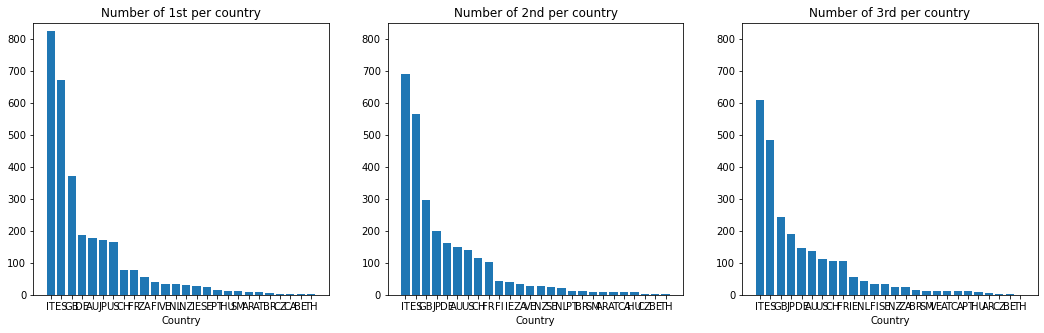

In [42]:
# get the total number of wins, second places and third places for each country

n_first_places = pilot_info.groupby(["Country"])["Victories"].sum().sort_values(ascending=False)
n_second_places = pilot_info.groupby(["Country"])["2nd places"].sum().sort_values(ascending=False)
n_third_places = pilot_info.groupby(["Country"])["3rd places"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1, 3, figsize = (18, 5))
ax[0].bar(n_first_places.index, n_first_places)
ax[0].set_ylim(bottom=0, top=850)
ax[0].set_title("Number of 1st per country")
ax[0].set_xlabel("Country")

ax[1].bar(n_second_places.index, n_second_places)
ax[1].set_ylim(bottom=0, top=850)
ax[1].set_title("Number of 2nd per country")
ax[1].set_xlabel("Country")

ax[2].bar(n_third_places.index, n_third_places)
ax[2].set_ylim(bottom=0, top=850)
ax[2].set_title("Number of 3rd per country")
ax[2].set_xlabel("Country")

plt.show()

According to the data on cyclists, Italy is the country with the most successful riders, with the Spanish and British riders coming in second and third, respectively.

It's also interesting to note that the number of championship victories is governed by a power law, meaning that a small number of riders consistently take home the most titles, just as they frequently finish first, second, and third in competitions. This pattern also appears in pilot victories within the same country.